a parameter= 0.534016202883
b parameter= 0.941185399646
variance of a: 0.0193523030776
variance of b: 0.0583518147785
std dev of a: 0.000374511634406
std dev of b: 0.00340493428794
covariance of a and b: -0.000554202696038
correlation coefficient: -0.490774071211


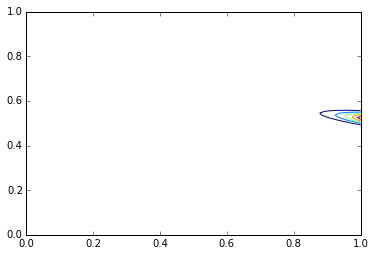

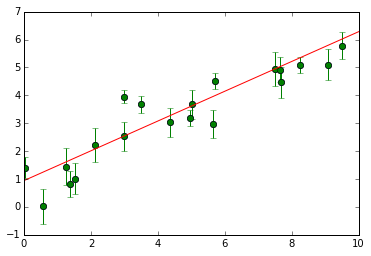

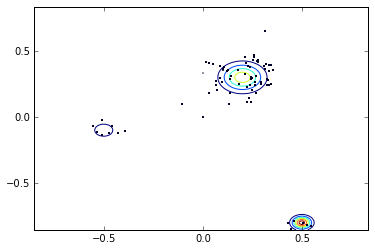

In [14]:
%matplotlib inline
import numpy as np
import math as math
import matplotlib.pyplot as plt

x,y,sigma = np.loadtxt("data1.dat.txt",unpack=True)
a=np.linspace(0,1,num=100)
da=1.0/100.0
db=1.0/100.0
b=np.linspace(0,1,num=100)
prob = np.zeros(shape=(100,100))
expa=0
expb=0


for i in range(len(a)):
    for j in range(len(b)):
        probfxn=1
        for k in range(len(x)):
            probfxn *=(1/(np.sqrt(2*3.14)*sigma[k]))*math.exp(-((y[k]-(a[i]*x[k]+b[j]))**2)/(2*sigma[k]**2))
        prob[i][j]=probfxn
        
        
        

vol=0
for i in range(len(a)):
    for j in range(len(b)):
        vol+=db*prob[i][j]*da


for i in range(len(a)):    
    for j in range(len(b)):
        expa += a[i]*prob[i][j]*db*da/vol 
        expb += b[i]*prob[j][i]*db*da/vol
        
#plotting the probabilty

plt.figure(1)
CS = plt.contour(b, a, prob)


        
        
        

print 'a parameter=',expa
print 'b parameter=',expb

#0.0023
#0.0037

plt.figure(2)
xi,yi,sigi = np.loadtxt("data1.dat.txt",unpack=True)
plt.plot(xi,yi,'o')
plt.errorbar(xi,yi,sigi,fmt='o')


xvar=np.linspace(0,10,100)

expectation_a=expa
expectation_b=expb
model=expectation_a*xvar+expectation_b

plt.plot(xvar, model)


siga=0
sigb=0

for i in range(len(a)):    
    for j in range(len(b)):
        siga += (a[i]-expa)**2*prob[i][j]*db*da/vol 
        sigb += (b[i]-expb)**2*prob[j][i]*db*da/vol
print 'variance of a:', siga**.5
print 'variance of b:',sigb**.5

print 'std dev of a:', siga
print 'std dev of b:', sigb
covab=0

for i in range(len(a)):    
    for j in range(len(b)):
        covab += (a[i]-expa)*(b[j]-expb)*prob[i][j]*db*da/vol 
        
print 'covariance of a and b:', covab


pco=covab/(siga*sigb)**.5
print'correlation coefficient:', pco

def liklihood(x, y):
    return 0.7*np.exp(-100*((x - 0.2)**2 + (y - 0.3)**2)) + 0.3*np.exp(-333*((x + 0.5)**2 + (y + 0.1)**2)) + np.exp(-500*((x - 0.5)**2 + (y + 0.8)**2))

#metropolis algorithmn implementation for the following liklihood function: 
#f(x,y)= 0.7exp[-100((x-0,2)**2+(y-0.3)**2]+0.3exp[-333((x+0.5)**2+(y+0.1)**2)]+exp[-500(((x=0.5)**2+(y+0.8)**2)]

xnew=[]
ynew=[]
old_pos=np.zeros(2)
old_prob=liklihood(old_pos[0],old_pos[1])

for n in range(10000):
    #walk a new step randomly
    new_pos=old_pos+np.random.standard_cauchy(size=2)
    new_prob=liklihood(new_pos[0],new_pos[1])
    
    #pick a random number from [0,1] on a uniform distribtuion
    r=np.random.rand()

    if r<= new_prob/old_prob:
        old_pos=new_pos
        old_prob=new_prob
    xnew.append(old_pos[0])
    ynew.append(old_pos[1])
    

    


#plot the monte carlo simulation on top of the liklihood function

plt.figure(3)
dx = 0.01
x = np.arange(np.min(xnew)-0.3, np.max(xnew)+0.3, dx)
y = np.arange(np.min(xnew)-0.3, np.max(xnew)+0.3, dx)
X, Y = np.meshgrid(x, y)
Z = liklihood(X, Y)
plt.plot(xnew,ynew,'o',markersize=0.5)
CS = plt.contour(X, Y, Z)
plt.show()



